In [18]:
import pandas as pd

file_path = "./ref/서울시자치구(연도별)CCTV 설치현황_241231.csv"
CCTV = pd.read_csv(file_path, encoding="EUC-KR", skiprows=1)
CCTV.head()

,순번,구분,총 계,2015년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
0,NaN,계,"113,273","9,702","8,827","10,108","10,594","12,562","11,865","9,358","9,397","13,857","17,003"
1,1,종로구,"2,339",146,76,115,137,68,231,86,234,924,322
2,2,중구,"3,118",356,219,366,385,159,352,416,137,135,593
3,3,용산구,"3,609",24,124,454,119,335,625,431,457,411,629
4,4,성동구,"4,638","1,295",228,881,383,477,386,294,170,320,204


In [19]:
cctv = CCTV[['구분','2024년']]
cctv.columns = ["local","count"]
cctv = cctv.loc[1:25]
cctv = cctv.reset_index(drop=True)
cctv

,local,count
0,종로구,322
1,중구,593
2,용산구,629
3,성동구,204
4,광진구,954
5,동대문구,578
6,중랑구,855
7,성북구,961
8,강북구,80
9,도봉구,575


In [3]:
import pandas as pd
import warnings
warnings.simplefilter("ignore",UserWarning)

file_path2 = "./ref/202412연령별인구현황월간.xlsx"
res = pd.read_excel(file_path2,sheet_name="연령별인구현황",skiprows=3)
res.head()

,행정기관코드,행정기관,총 거주자수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,1100000000,서울특별시,"9,261,703","9,261,703","483,371","718,785","1,303,570","1,434,483","1,370,415","1,467,335",...,"350,985","690,043","716,466","693,838","746,838","691,396","421,108","209,750","35,646","1,054"
1,1111000000,서울특별시 종로구,"136,624","136,624","5,507","9,335","20,852","19,597","18,244","22,896",...,"4,755","11,079","9,837","9,429","11,642","10,312","6,370","4,078",737,26
2,1114000000,서울특별시 중구,"119,053","119,053","5,310","5,846","16,706","21,451","16,181","18,168",...,"2,922","9,265","10,760","7,992","9,123","9,108","5,844","3,543",684,15
3,1117000000,서울특별시 용산구,"200,682","200,682","10,226","12,782","27,602","36,414","28,838","31,831",...,"6,241","15,078","18,541","14,587","16,357","14,256","8,361","5,302",985,33
4,1120000000,서울특별시 성동구,"271,522","271,522","15,966","17,271","38,819","46,194","39,383","42,810",...,"8,686","20,129","23,576","19,680","21,876","19,500","11,531","6,488","1,013",19


In [20]:
cctv

,local,count
0,종로구,322
1,중구,593
2,용산구,629
3,성동구,204
4,광진구,954
5,동대문구,578
6,중랑구,855
7,성북구,961
8,강북구,80
9,도봉구,575


In [21]:
data = res[['행정기관','총 거주자수']]
data.columns = ["local", "population"]
data = data.loc[1:25]
data['local'] = data['local'].apply(lambda x: x.replace("서울특별시 ","").strip())
data = data.reset_index(drop=True) # drop = True는 기본 인덱스를 삭제하고 새롭게 부여
data

,local,population
0,종로구,"136,624"
1,중구,"119,053"
2,용산구,"200,682"
3,성동구,"271,522"
4,광진구,"329,478"
5,동대문구,"336,395"
6,중랑구,"377,311"
7,성북구,"418,793"
8,강북구,"281,508"
9,도봉구,"301,311"


In [22]:
# 공백 조심data['local'] = data['local'].apply(lambda x len(x))
data['local'] = data['local'].apply(lambda x: x.replace(" 구","").strip() if len(x.strip())>2 else x.strip())

In [26]:
total = pd.merge(cctv, data, on='local')
total['population'] = total['population'].str.replace(",","").astype(int)
total['count'] = total['count'].str.replace(',', '').astype(int)
total = total.sort_values(by="population", ascending=False)
total = total.set_index('local') # 중요함.
total

,count,population
local,,
송파구,679,645637
강서구,284,552926
강남구,1339,550039
노원구,1352,488972
관악구,1025,474400
강동구,689,474071
은평구,621,457957
양천구,583,428500
성북구,961,418793


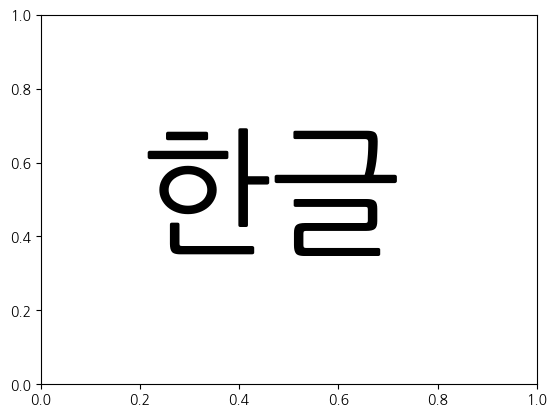

In [27]:
# OS에 사용가능한 , 설치된 폰트를 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist

# 리눅스용 폰트 경로 설정
plt.rc('font',family="NanumGothic")
plt.text(0.2,0.4,'한글',size=100)
plt.show()

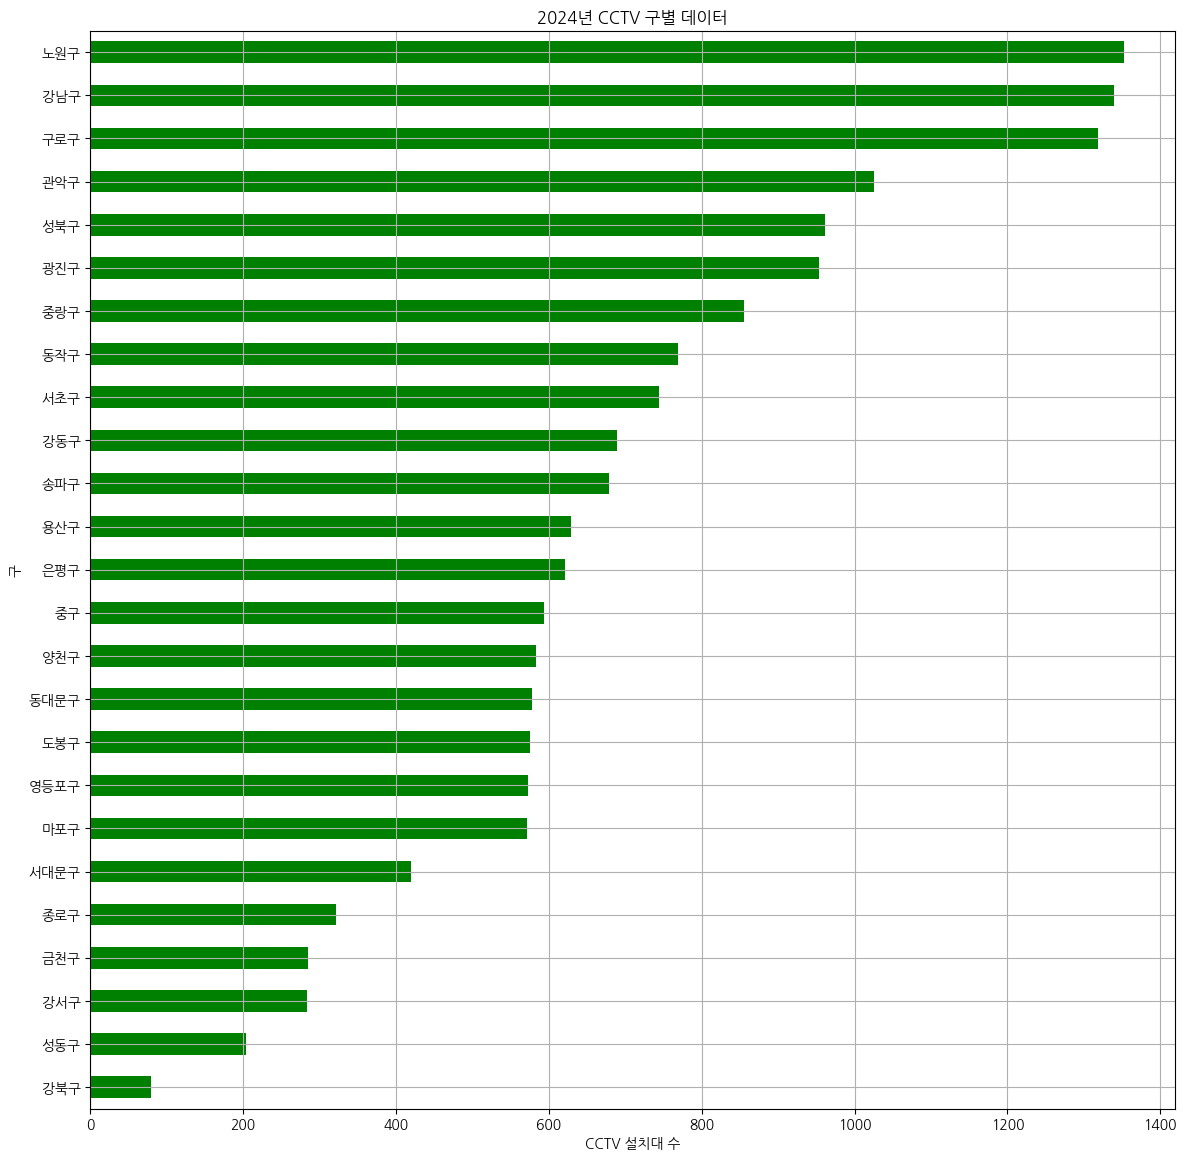

In [46]:
total['count'].sort_values().plot( kind="barh",grid=True,figsize=(14,14), ylabel="구",color="g")
plt.title("2024년 CCTV 구별 데이터")
plt.xlabel("CCTV 설치대 수")

plt.show()

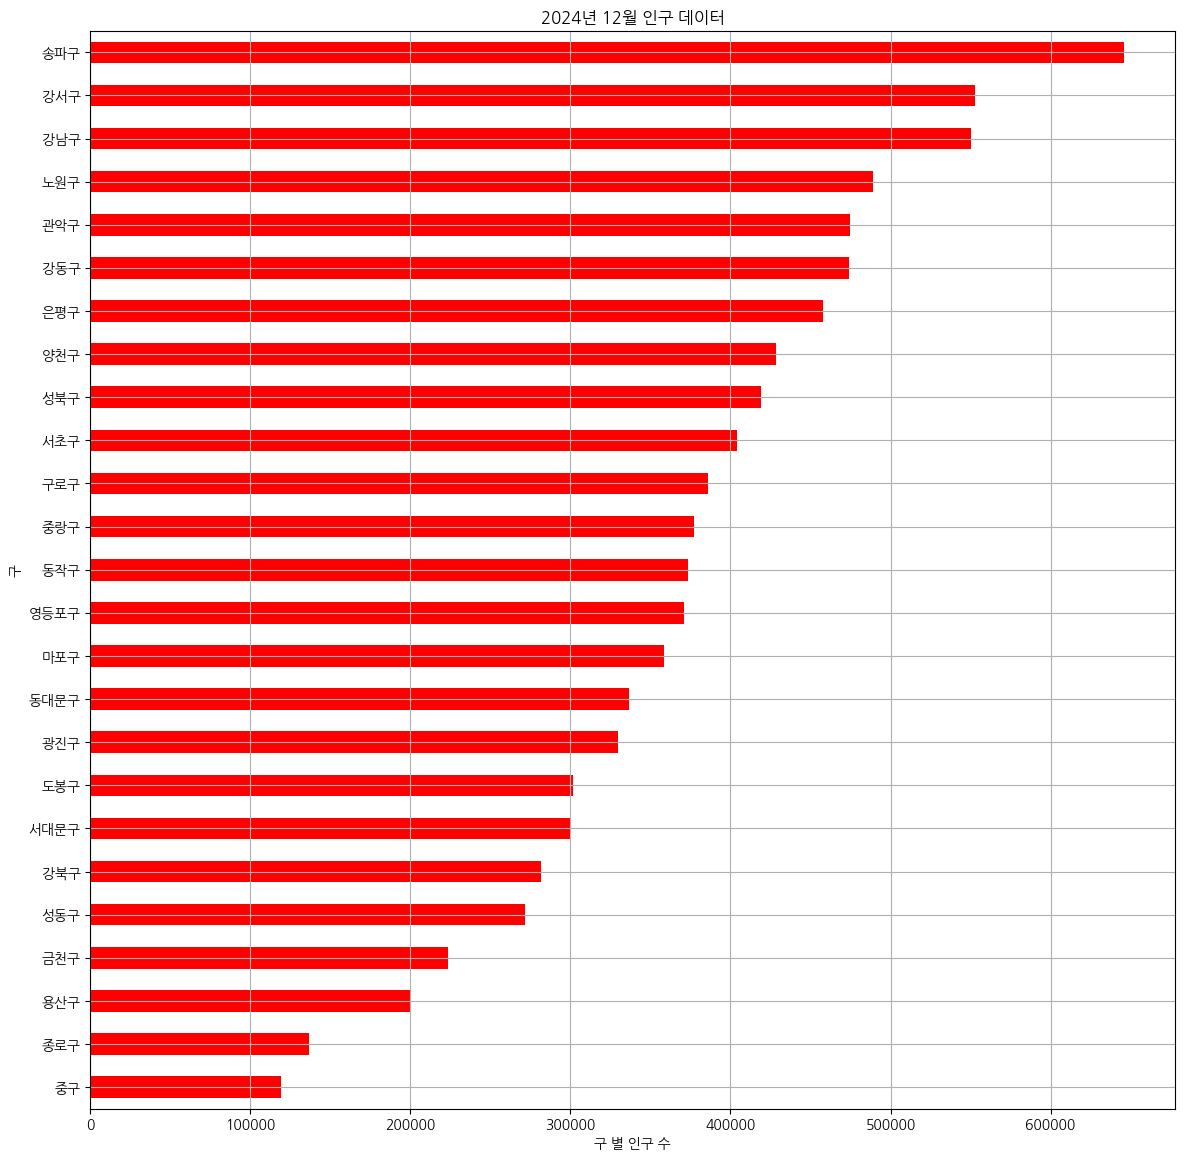

In [47]:
total['population'].sort_values().plot(kind="barh", grid=True, figsize=(14,14), ylabel="구",color="r")
plt.title("2024년 12월 인구 데이터")
plt.xlabel("구 별 인구 수")

plt.show()

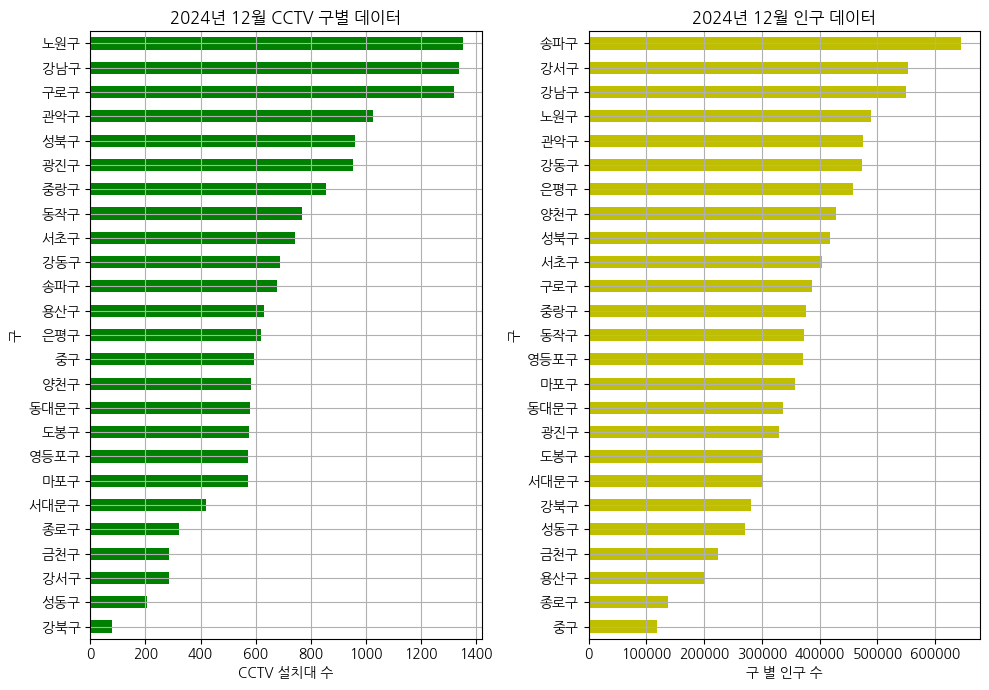

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(60, 50))
total['count'].sort_values().plot(kind='barh', ax=ax[0], grid=True, figsize=(10,7), ylabel="구",color='g')
ax[0].set_title("2024년 12월 CCTV 구별 데이터")
ax[0].set_xlabel("CCTV 설치대 수")

total['population'].sort_values().plot(kind="barh", ax=ax[1], grid=True, figsize=(10,7), ylabel="구",color='y')
ax[1].set_title("2024년 12월 인구 데이터")
ax[1].set_xlabel("구 별 인구 수")
plt.tight_layout()
plt.show()

In [49]:
import pandas as pd 

file_path3 = "./ref/5대범죄발생현황_20250307.csv"
CRIM = pd.read_csv(file_path3, encoding="utf-8",)
CRIM.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2,2023.3,2023.4
0,자치구별(1),자치구별(2),합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),살인,강도,강간·강제추행,절도,폭력
2,자치구별(1),자치구별(2),발생,발생,발생,발생,발생
3,합계,종로구,5,5,239,1169,1563
4,합계,중구,3,6,212,1520,1607
